# 数据

In [10]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import random

In [63]:
class SGDRegression(object):
    def __init__(self, train_size, max_iter):
        self.train_size = int(train_size)
        self.learning_rate = 0.0006
        self.max_iter = max_iter
        self.batch_size = int(train_size - 1)
        self.theta = np.array([1.0, 1.0])
    
    def train(self, x_train, y_train):
        # 初始化
        num_samples = len(x_train[0])
        pred_y = np.zeros(len(x_train[0]))
        self.loss = np.zeros(self.max_iter)
        tag = 0
        for i in range(self.max_iter):
            # 从x_list中随机选择train_size个样本，返回选中的x_list的元素位置
            batch_idxs = np.random.choice(len(x_train[0]), self.batch_size)
            x_train_batch = np.array([x_train[:, j] for j in batch_idxs]).T
            y_train_batch = np.array([y_train[j] for j in batch_idxs])
            self.cal_step_gradient(x_train_batch, y_train_batch)
            self.loss[i] = self.eval_loss(x_train, y_train)
        print('loss is {0}'.format(self.eval_loss(x_train, y_train)))
        itera = np.array(range(self.max_iter))
    
    def cal_step_gradient(self, x_train_batch, y_train_batch):
        avg_dtheta = np.array([0.0, 0.0])
        for i in range(self.batch_size):
            pred_y = self.hypothesis(x_train_batch[:, i])  # 计算预测值
            dw, db = self.gradient(pred_y, y_train_batch[i], x_train_batch[:, i])  # 计算当前步的梯度
            avg_dtheta[1] += db
            avg_dtheta[0] += dw
        avg_dtheta[1] /= self.batch_size
        avg_dtheta[0] /= self.batch_size
        self.theta[1] -= self.learning_rate * avg_dtheta[1]
        self.theta[0] -= self.learning_rate * avg_dtheta[0]
            
    def hypothesis(self, x_train):
        return self.theta @ x_train
    
    # gradient: get dw & db
    # 这里应该是得到损失函数关于各个参数的导数，dJ/dw 和 dJ/db
    def gradient(self, pred_y, gt_y, x):
        diff = pred_y - gt_y   # 这里对应的是损失函数的导数，gt_y = ground true 真实值，已知的
        dw = diff * x[0]          # pred_y 是hypothesis算出来的
        db = diff
        return dw, db
    
    # 评价函数,其实计算的是损失函数
    def eval_loss(self, x_train, y_train):
        return np.mean(0.5 * (self.hypothesis(x_train) - y_train) ** 2)
        
    
    
    def pred(self, x_train):
        pred_y = np.zeros(len(x_train))
        for i in range(len(x_train)):
            pred_y[i] = self.hypohesis(x_train[i])
        return pred_y

In [48]:
# 生成样本数据
def gen_sample_data(theta, num_samples):
    x_list = np.array([[i, 1] for i in range(num_samples)]).T
    y_list = theta @ x_list
    #y_list += np.random.normal(size = y_list.size)
    y_list += np.random.randn(y_list.size)
    return x_list, y_list

In [28]:
def train_test_split(x_list, y_list, train_size, seed):
    random.seed(seed)    # 设置随机种子来保证实验结果的可重复性。
    x_train = random.sample(tuple(x_list[0]), int(len(x_list[0]) * train_size))  # 从x_list中取75%个不重复的样本当做训练数据集
    y_train = [y_list[list(x_list[0]).index(j)] for j in x_train]
    x_test = [x_list[:, j] for j in range(len(x_list[0])) if x_list[0, j] not in x_train]
    y_test = [y_list[j] for j in range(len(y_list)) if y_list[j] not in y_train]
    x_train = np.array(x_train)
    x_train = x_train[np.newaxis, :]
    one = np.ones(len(x_train[0]))
    one = one[np.newaxis, :]
    x_train = np.append(x_train, one, axis = 0)
    y_train = np.array(y_train)
    x_test = np.array(x_test).T
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

In [68]:
def run():
    # 给定参数
    # 利用Namespace把参数储存起来
    args = Namespace(
        seed = 1234,          # 指定随机种子，目的是为了使每一次生成的随机一致,伪随机数
        num_samples = 100,    # 指定样本数量
        train_size = 0.75,    # 训练数据集的大小
        test_size = 0.25,     # 测试数据集的大下
        num_epochs = 100,     # 迭代次数
        #learning_rate = 0.0005  # 学习率
    )
    np.random.seed(args.seed)    # 设置随机种子来保证实验结果的可重复性。
    #theta = np.array([np.random.randint(0, 10) + np.random.random(), np.random.randint(0, 5) + np.random.random()])   # random.random()是随机加了点噪声
    theta = np.array([0.8, 6])
    print('b_ori:', theta[1])
    print('w_ori:', theta[0])
    # 生成数据集
    x_list, y_list= gen_sample_data(theta, args.num_samples)
    # 划分训练集和测试集
    x_train, y_train, x_test, y_test = train_test_split(x_list, y_list, args.train_size, args.seed)
    lm = SGDRegression(args.train_size * args.num_samples, args.num_epochs)
    lm.train(x_train, y_train)
    print(lm.loss[:100])
    plt.plot(lm.loss[:])
    print('w:', lm.theta[0])
    print('b:', lm.theta[1])

b_ori: 6.0
w_ori: 0.8
loss is 8.265485409734888
[44.18265953 57.10535858 60.59752537 33.56290285 15.40111819 13.15996861
  9.30285054  8.11408481  4.91817172  4.57317539  6.13465198  7.29279092
  7.88899305  8.39084588  8.86869976  9.42371624  7.8784386   7.66293496
  6.75687481  7.81583058  5.743089    5.84375216  5.09855628  4.45834764
  4.32506991  4.33521904  4.20195267  4.09974822  4.04012246  4.06353766
  4.03219225  4.03357069  4.05565286  4.04454378  4.23860058  4.09818368
  4.45270115  5.00245345  4.36214814  4.25634484  4.03610156  4.02665777
  4.08308257  4.17323079  4.34338934  4.18456388  4.2304414   4.5387204
  4.17685964  4.21164242  4.41286568  4.70420903  4.16695054  4.00610325
  4.0715731   4.03585088  4.00689695  4.06269133  4.32908384  4.7509369
  3.99750914  3.99905839  3.99953761  4.16515483  4.05900041  3.99843176
  4.06386431  4.25585112  4.09765741  4.08575574  4.11115397  4.07386984
  4.93917029  5.39818206  6.42493582  7.25416197  5.44452383  5.49118504
  7.6

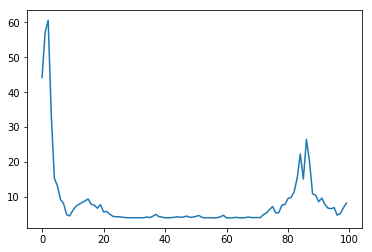

In [69]:
# lr = 0.0001   max_iter = 100     
if __name__ == '__main__':
    run()